In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

In [2]:
train_data = datasets.CIFAR10(root='../Data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.CIFAR10(root='../Data', train=False, download=True, transform=transforms.ToTensor())

100.0%


Extracting ../Data\cifar-10-python.tar.gz to ../Data
Files already downloaded and verified


In [3]:
epochs = 20
batch_size = 50
input_size = 32*32
output_size = 10
learning_rate = 0.001
train_data_size = len(train_data)
test_data_size = len(test_data)
train_batch_count = len(train_data) // batch_size
test_batch_count = len(test_data) // batch_size

In [4]:
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [5]:
class_names = ['plane', '  car', ' bird', '  cat', ' deer', '  dog', ' frog', 'horse', ' ship', 'truck']

In [6]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(6*6*16,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1,6*6*16)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

In [7]:
model = CNN()

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [9]:
train_losses = []
test_losses = []
train_accuracy = []
test_accuracy = []

temp = 200

for epoch in range(epochs):

    epoch_train_correct = 0
    epoch_test_correct = 0

    for batch_index, (x_train, y_train) in enumerate(train_loader):
        y_pred = model(x_train)
        loss = criterion(y_pred, y_train)

        predictions = torch.max(y_pred, dim=1)[1]
        batch_correct = (predictions == y_train).sum()

        epoch_train_correct += batch_correct

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % temp == 0:
            print(f'Epoch: {epoch+1}  Batch: {batch_index :3}  Loss: {loss.item():8.6f}  Accuracy: {((epoch_train_correct * 100) / ((batch_index + 1) * batch_size)):6.3f}%')

    train_losses.append(loss.item())
    train_accuracy.append(100 * epoch_train_correct / train_data_size)

    with torch.no_grad():
        for batch_index, (x_test, y_test) in enumerate(test_loader):
            y_pred = model(x_test)

            predictions = torch.max(y_pred, dim=1)[1]
            batch_correct = (predictions == y_test).sum()

            epoch_test_correct += batch_correct

        loss = criterion(y_pred, y_test)
    test_losses.append(loss.item())
    test_accuracy.append(100 * epoch_test_correct / test_data_size)

Epoch: 1  Batch:   0  Loss: 2.305421  Accuracy:  6.000%
Epoch: 1  Batch: 200  Loss: 1.813259  Accuracy: 22.517%
Epoch: 1  Batch: 400  Loss: 1.632337  Accuracy: 28.843%
Epoch: 1  Batch: 600  Loss: 1.986649  Accuracy: 32.546%
Epoch: 1  Batch: 800  Loss: 1.674289  Accuracy: 34.916%
Epoch: 2  Batch:   0  Loss: 1.387853  Accuracy: 50.000%
Epoch: 2  Batch: 200  Loss: 1.674827  Accuracy: 45.532%
Epoch: 2  Batch: 400  Loss: 1.578330  Accuracy: 46.419%
Epoch: 2  Batch: 600  Loss: 1.435195  Accuracy: 47.364%
Epoch: 2  Batch: 800  Loss: 1.488916  Accuracy: 47.910%
Epoch: 3  Batch:   0  Loss: 1.097024  Accuracy: 62.000%
Epoch: 3  Batch: 200  Loss: 1.473215  Accuracy: 51.871%
Epoch: 3  Batch: 400  Loss: 1.076724  Accuracy: 52.628%
Epoch: 3  Batch: 600  Loss: 1.227539  Accuracy: 53.208%
Epoch: 3  Batch: 800  Loss: 1.227286  Accuracy: 53.448%
Epoch: 4  Batch:   0  Loss: 1.201454  Accuracy: 50.000%
Epoch: 4  Batch: 200  Loss: 0.893517  Accuracy: 57.214%
Epoch: 4  Batch: 400  Loss: 1.009303  Accuracy: 

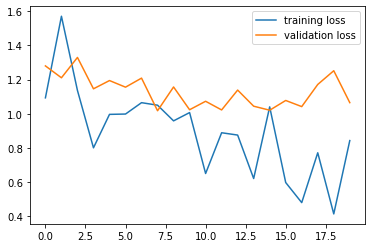

In [10]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.legend()

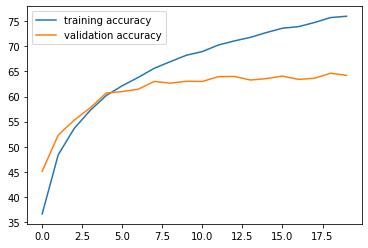

In [11]:
plt.plot(train_accuracy, label='training accuracy')
plt.plot(test_accuracy, label='validation accuracy')
plt.legend()

In [12]:
torch.save(model.state_dict(),'CIFAR_model_state.pt')